In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import io
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
data = pd.read_excel('kyphosis.xlsx')

In [14]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [16]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

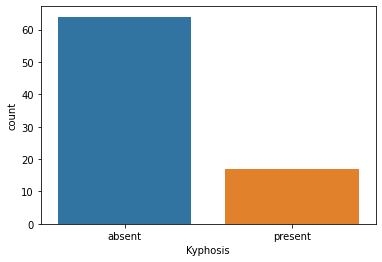

In [17]:
sns.countplot(x = data.Kyphosis)

Text(0.5, 1.0, 'Age disributation')

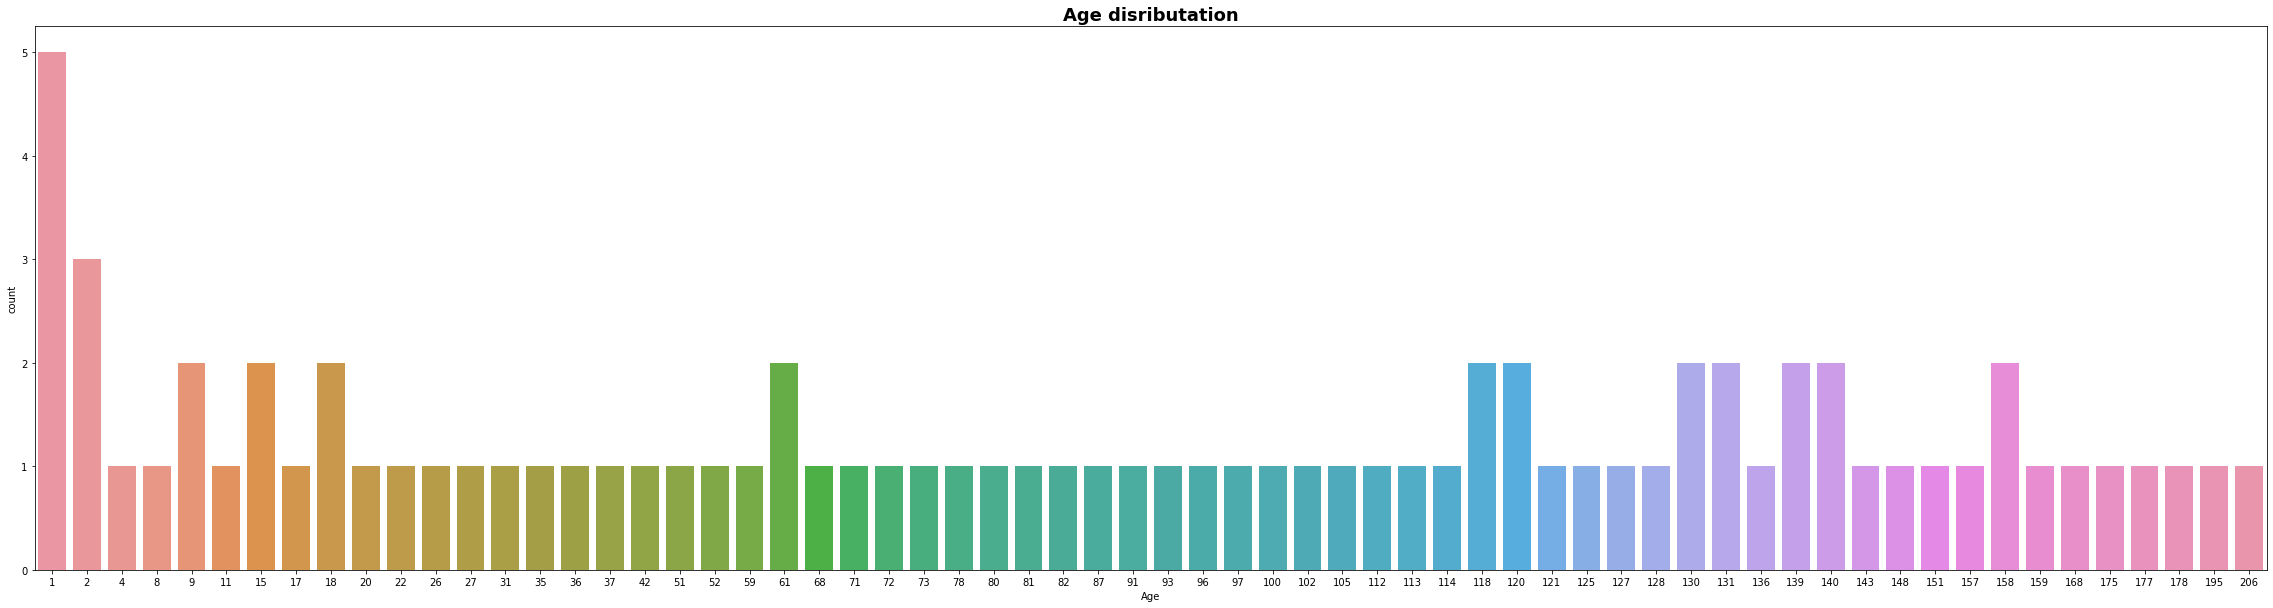

In [19]:
ax = plt.subplots(figsize = (40,10))
ax=sns.countplot(x = data.Age)
ax.set_title('Age disributation',fontsize = 18, fontweight='bold' )

Text(0, 0.5, 'Frequency')

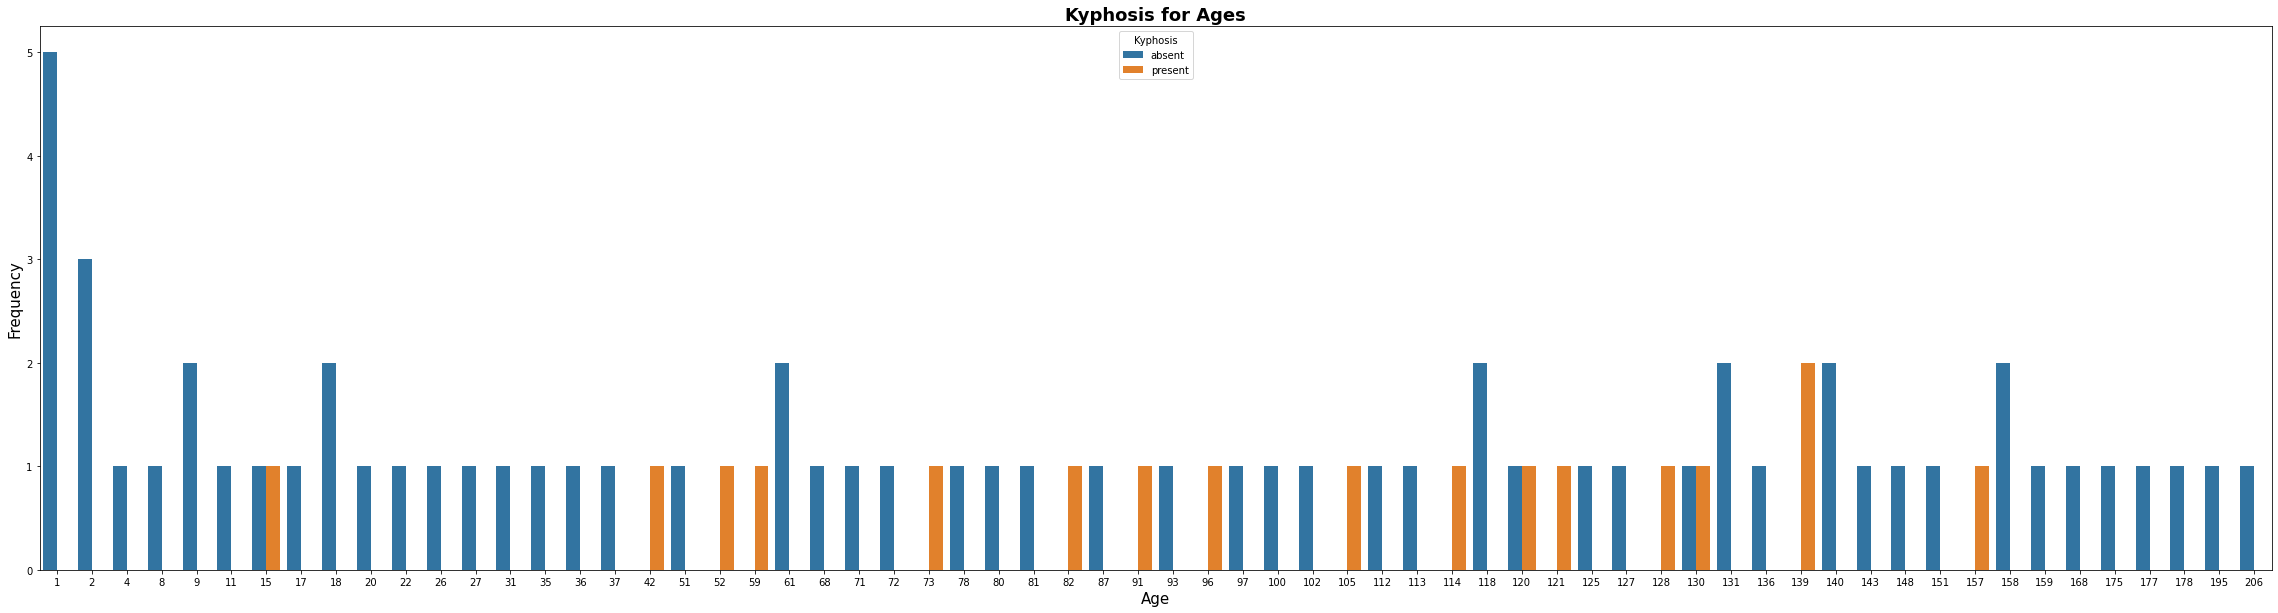

In [21]:
countplt, ax = plt.subplots(figsize = (40,10))
ax = sns.countplot(hue = data.Kyphosis,x = data.Age)
ax.set_title('Kyphosis for Ages',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)

Text(0.5, 1.0, 'Number of vertebrae disributation')

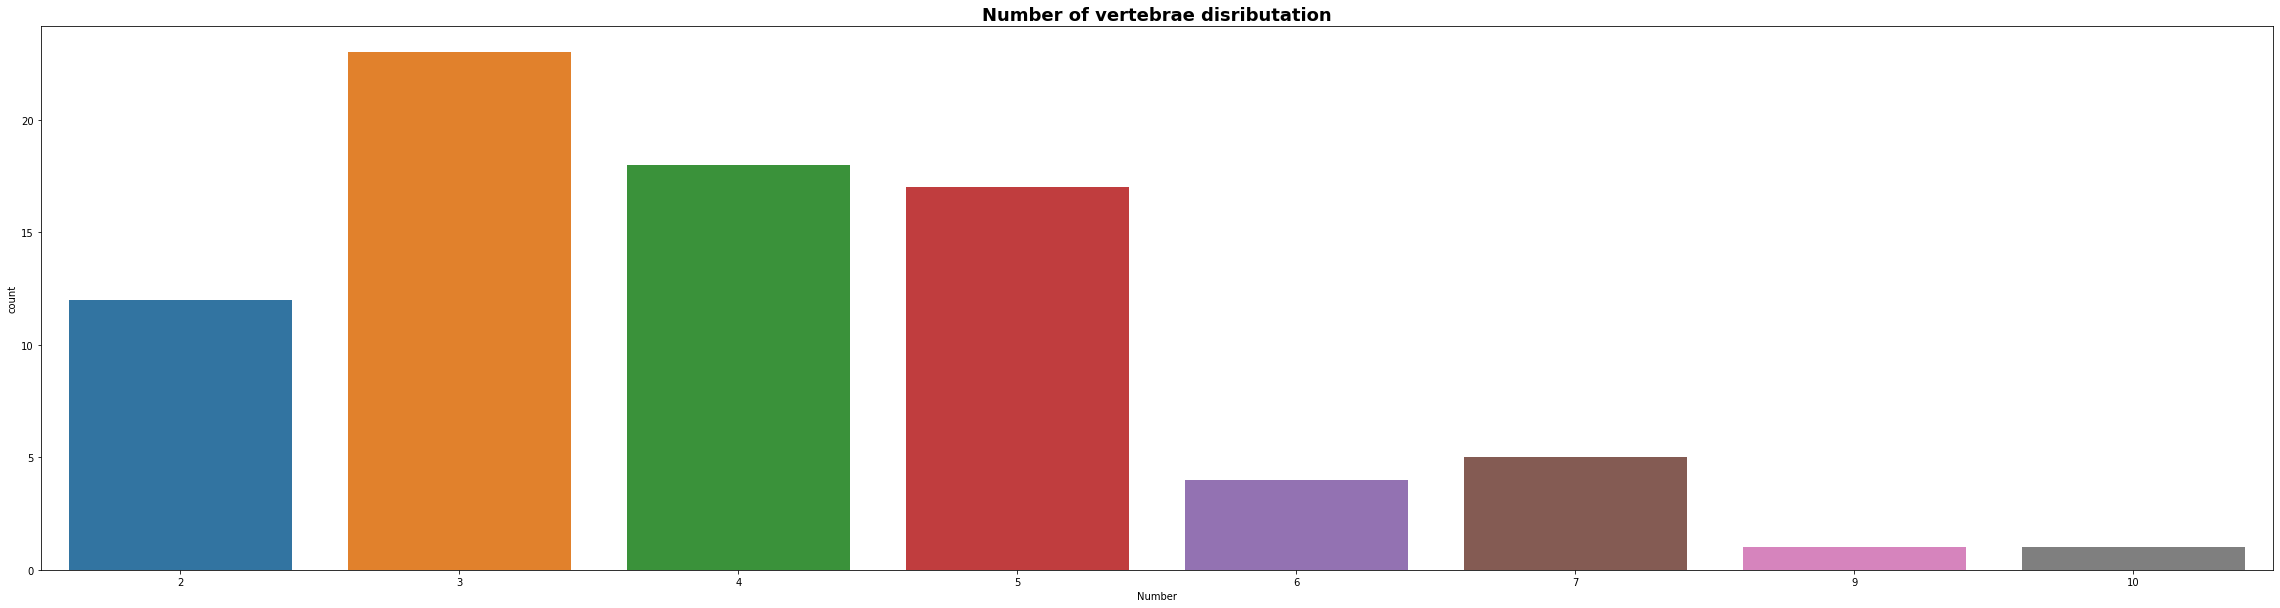

In [23]:
ax = plt.subplots(figsize = (40,10))
ax=sns.countplot(x = data.Number)
ax.set_title('Number of vertebrae disributation',fontsize = 18, fontweight='bold' )

Text(0, 0.5, 'Frequency')

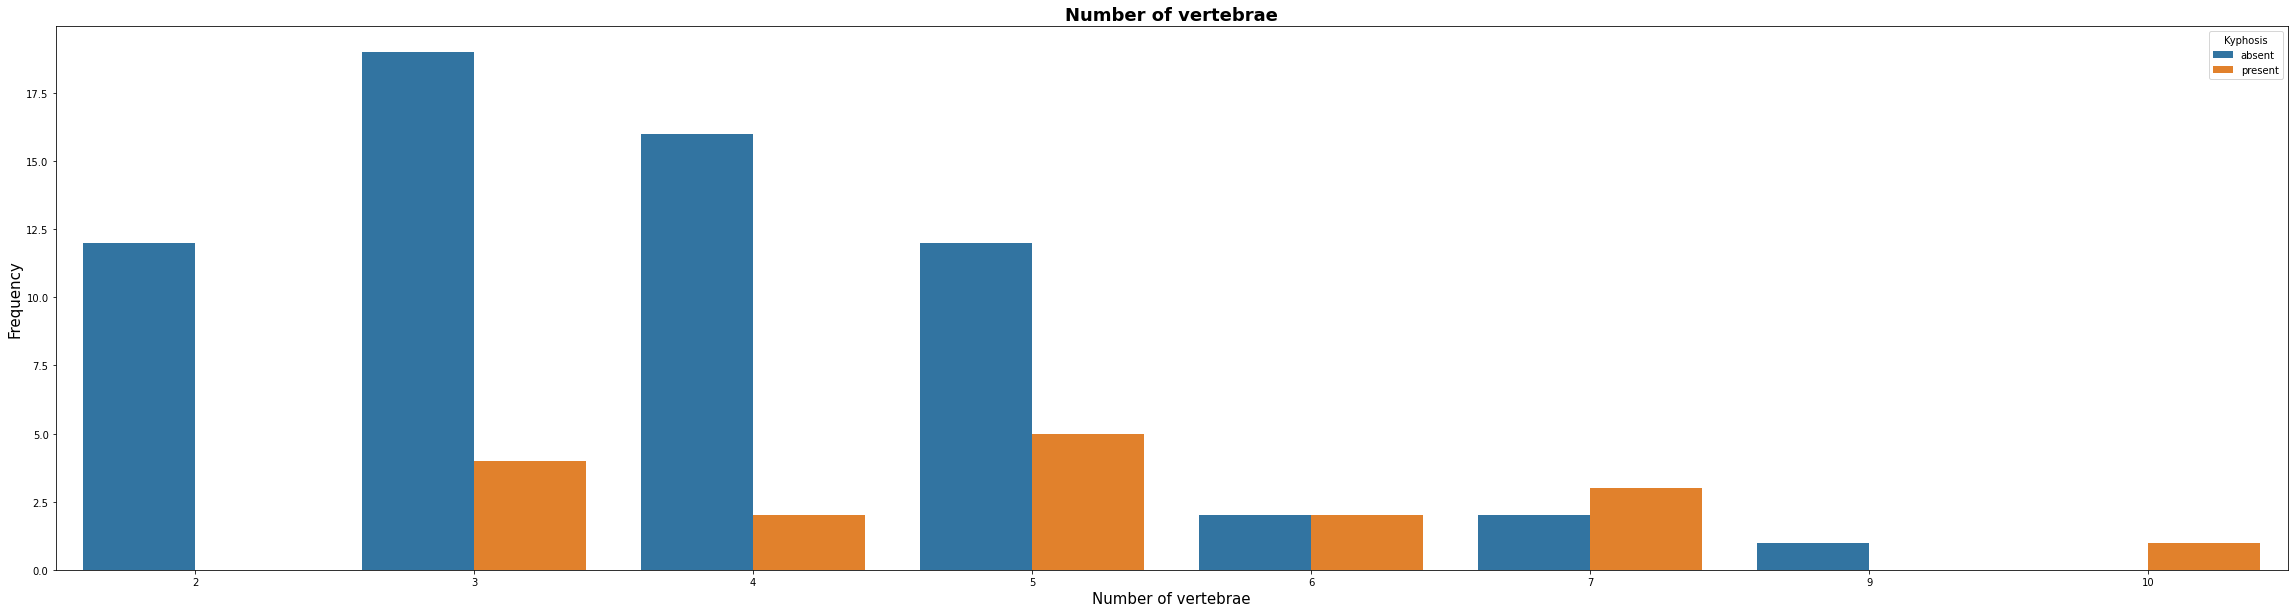

In [26]:
countplt, ax = plt.subplots(figsize = (40,10))
ax = sns.countplot(hue = data.Kyphosis,x = data.Number)
ax.set_title('Number of vertebrae',fontsize = 18, fontweight='bold')
ax.set_xlabel('Number of vertebrae', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)

Text(0.5, 1.0, 'topmost vertebrae disributation')

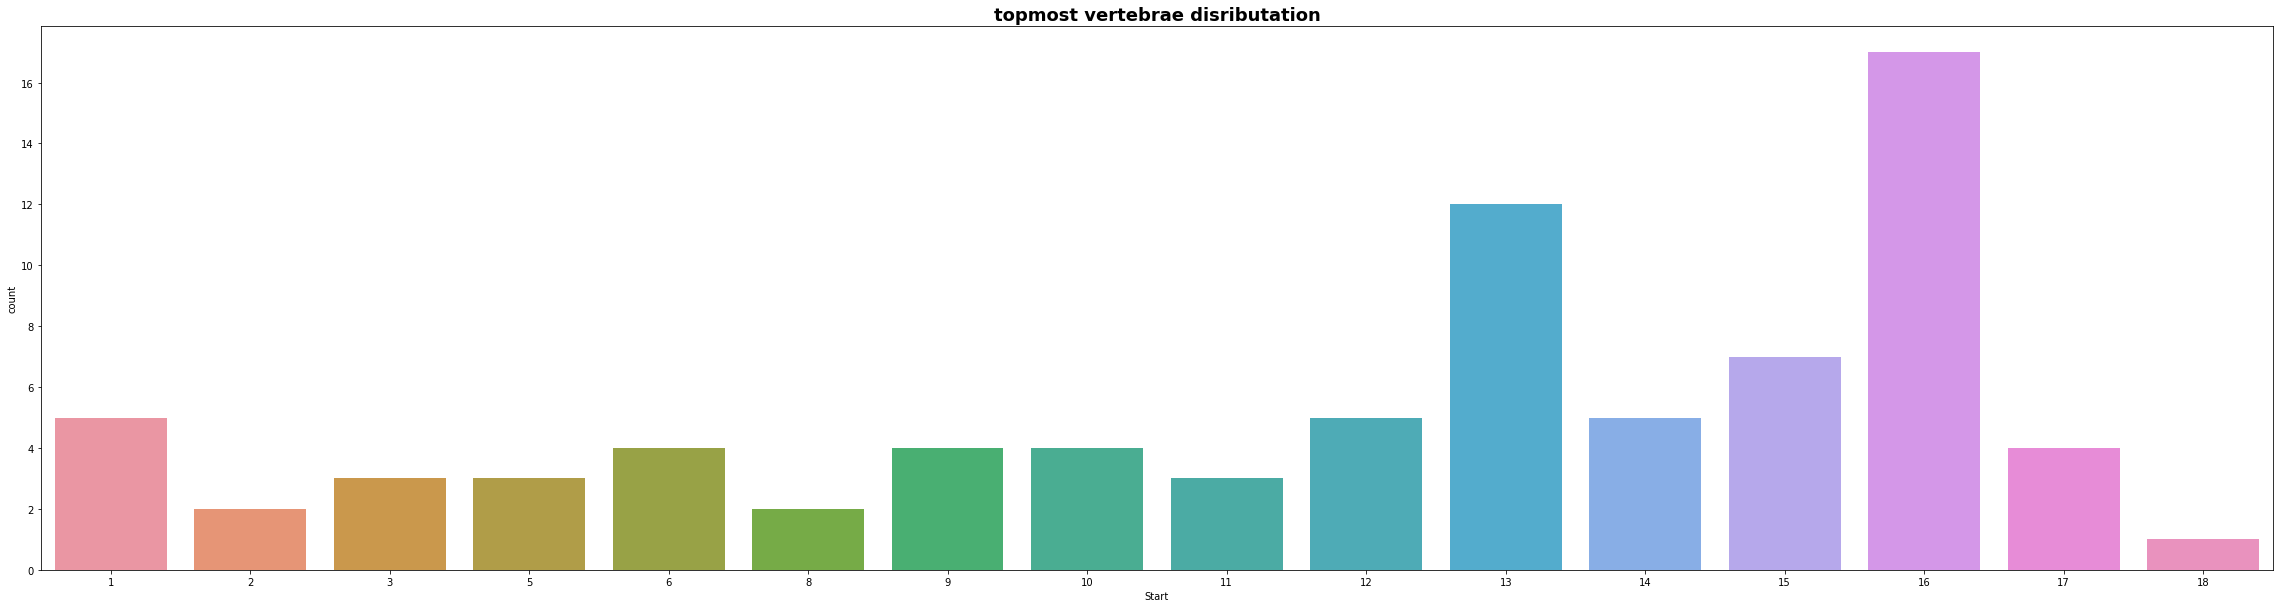

In [25]:
ax = plt.subplots(figsize = (40,10))
ax=sns.countplot(x = data.Start)
ax.set_title('topmost vertebrae disributation',fontsize = 18, fontweight='bold' )

Text(0, 0.5, 'Frequency')

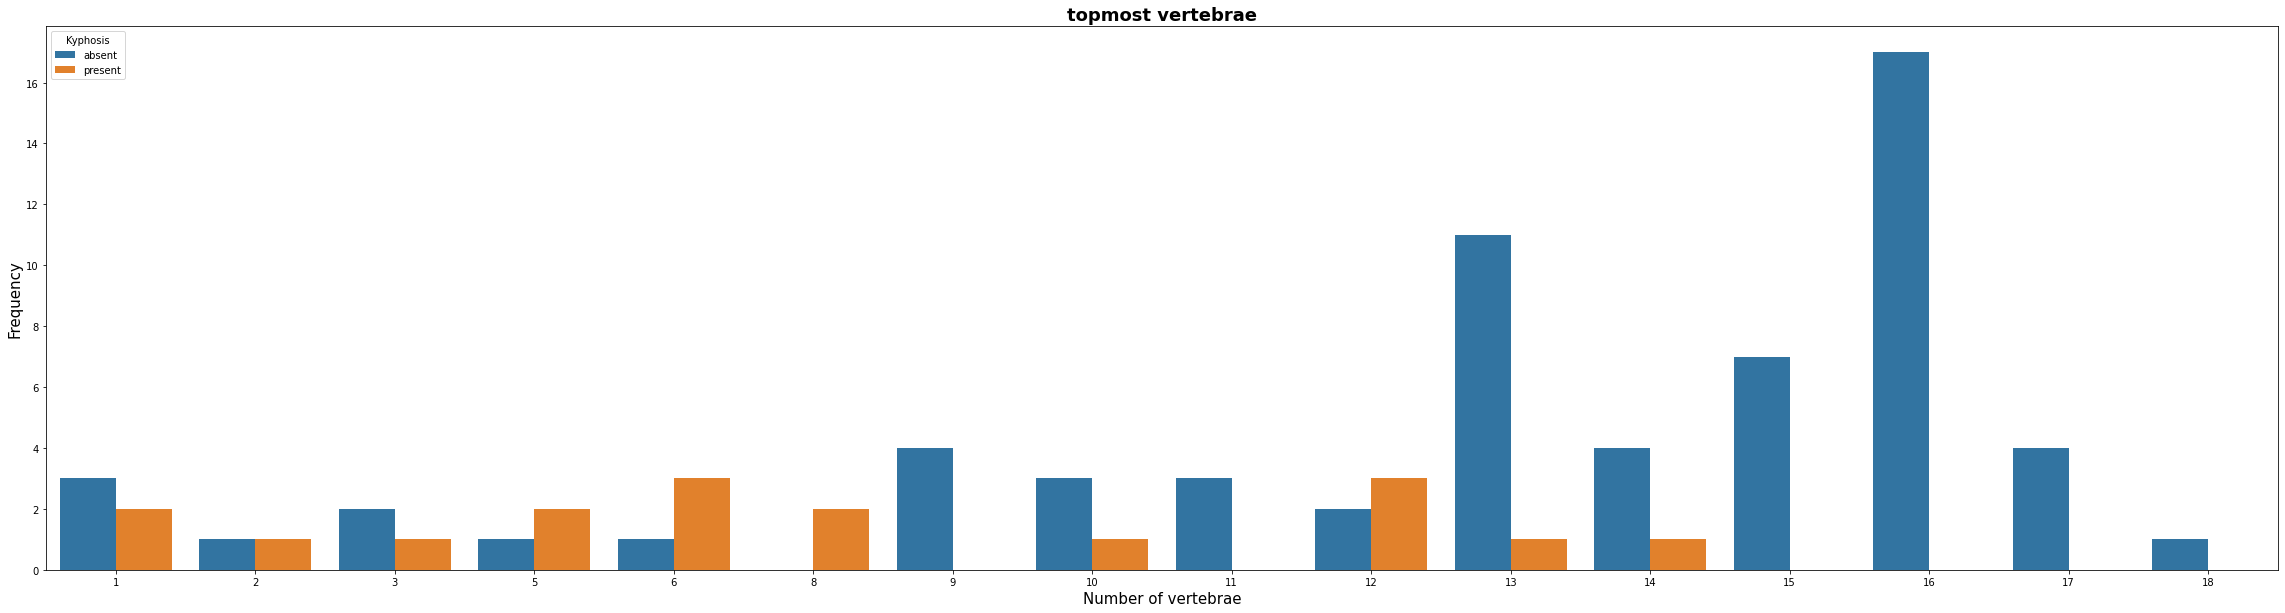

In [27]:
countplt, ax = plt.subplots(figsize = (40,10))
ax = sns.countplot(hue = data.Kyphosis,x = data.Start)
ax.set_title('topmost vertebrae',fontsize = 18, fontweight='bold')
ax.set_xlabel('Number of vertebrae', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)

(array([19.,  7.,  6.,  8.,  7.,  9., 13.,  6.,  4.,  2.]),
 array([  1. ,  21.5,  42. ,  62.5,  83. , 103.5, 124. , 144.5, 165. ,
        185.5, 206. ]),
 <BarContainer object of 10 artists>)

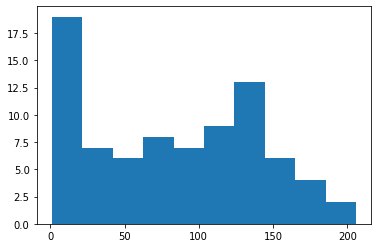

In [28]:
plt.hist(x = data.Age)

(array([ 7.,  3.,  7.,  0.,  6.,  7.,  5., 17., 24.,  5.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

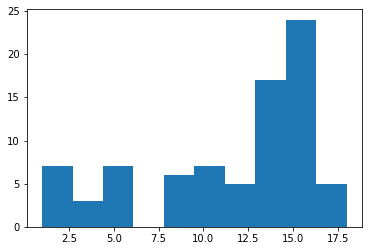

In [29]:
plt.hist(x = data.Start)

(array([12., 23., 18., 17.,  0.,  4.,  5.,  0.,  1.,  1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

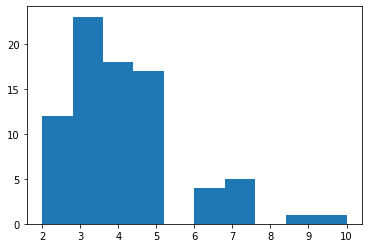

In [30]:
plt.hist(x = data.Number)

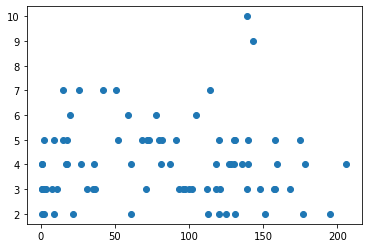

In [32]:
plt.scatter(x = data.Age,y= data.Number)   

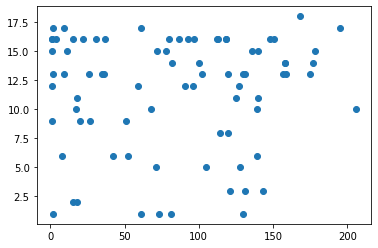

In [33]:
plt.scatter(x = data.Age,y= data.Start)   

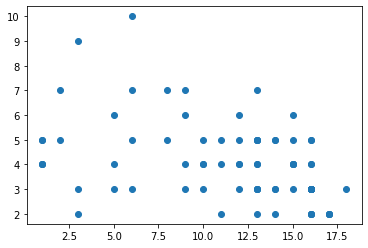

In [34]:
plt.scatter(x = data.Start,y= data.Number)   

In [35]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [36]:
Y = data.Kyphosis

In [37]:
Y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [38]:
X = data.drop('Kyphosis',axis=1)

In [39]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [41]:
X_train.shape

(56, 3)

In [42]:
X_test.shape

(25, 3)

# Gini

In [43]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100)

In [44]:
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=100)

In [45]:
Y_pred_gini = clf_gini.predict(X_test)

In [46]:
Y_pred_gini

array(['absent', 'absent', 'present', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'present', 'absent',
       'present'], dtype=object)

In [47]:
confusion_matrix(Y_test, Y_pred_gini)

array([[14,  8],
       [ 2,  1]], dtype=int64)

In [48]:
print(classification_report(Y_test, Y_pred_gini))

              precision    recall  f1-score   support

      absent       0.88      0.64      0.74        22
     present       0.11      0.33      0.17         3

    accuracy                           0.60        25
   macro avg       0.49      0.48      0.45        25
weighted avg       0.78      0.60      0.67        25



# gain or entropy

In [49]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)

In [50]:
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [51]:
Y_pred_entropy = clf_entropy.predict(X_test)

In [52]:
confusion_matrix(Y_test, Y_pred_entropy)

array([[17,  5],
       [ 2,  1]], dtype=int64)

In [53]:
print(classification_report(Y_test, Y_pred_entropy))

              precision    recall  f1-score   support

      absent       0.89      0.77      0.83        22
     present       0.17      0.33      0.22         3

    accuracy                           0.72        25
   macro avg       0.53      0.55      0.53        25
weighted avg       0.81      0.72      0.76        25



# Q6 rf

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [56]:
data.shape

(81, 4)

In [57]:
data.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [61]:
model = RandomForestClassifier(random_state=100)

In [62]:
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=100)

In [65]:
Y_pred=model.predict(X_test)

In [66]:
model.predict_proba(X_test)

array([[0.88, 0.12],
       [0.73, 0.27],
       [0.82, 0.18],
       [1.  , 0.  ],
       [0.22, 0.78],
       [0.88, 0.12],
       [1.  , 0.  ],
       [0.92, 0.08],
       [0.28, 0.72],
       [0.98, 0.02],
       [0.88, 0.12],
       [0.7 , 0.3 ],
       [0.96, 0.04],
       [0.73, 0.27],
       [0.59, 0.41],
       [0.92, 0.08],
       [0.89, 0.11],
       [0.99, 0.01],
       [0.7 , 0.3 ],
       [0.53, 0.47],
       [0.98, 0.02],
       [0.68, 0.32],
       [0.45, 0.55],
       [1.  , 0.  ],
       [0.28, 0.72]])

In [67]:
Y_pred

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'present'], dtype=object)

In [68]:
confusion_matrix(Y_test, Y_pred)

array([[18,  4],
       [ 3,  0]], dtype=int64)

In [69]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      absent       0.86      0.82      0.84        22
     present       0.00      0.00      0.00         3

    accuracy                           0.72        25
   macro avg       0.43      0.41      0.42        25
weighted avg       0.75      0.72      0.74        25

